# Election Data Project - Polls and Donors

This Data Project will be looking at data from the 2012 election.

In this project I will analyze two datasets. The first data set will be the results of political polls. I will analyze this aggregated poll data and answer some questions:

1.) Who was being polled and what was their party affiliation?
2.) Did the poll results favor Romney or Obama?
3.) How do undecided voters effect the poll?
4.) Can we account for the undecided voters?
5.) How did voter sentiment change over time?
6.) Can we see an effect in the polls from the debates?



In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#Grab data from the web (HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will require a .read() method
from io import StringIO

In [4]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

#Use requests to get the information in text form
source = requests.get(url).text

#Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source)

## I. Data Investigation

In [5]:
#Set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)

#Let's get some info about the data
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


## II. Data Exploration and Visualization

<AxesSubplot:xlabel='Affiliation', ylabel='count'>

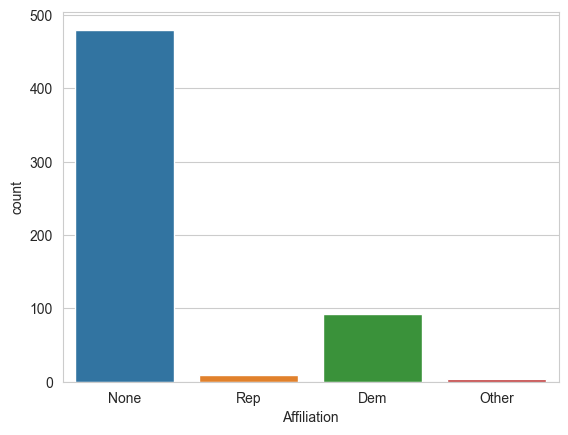

In [7]:
#Factor plot the affiliation
sns.countplot(x='Affiliation', data= poll_df)

We can see that the majority of voters are actually Undecided/Not Affiliated with any party

<AxesSubplot:xlabel='Affiliation', ylabel='count'>

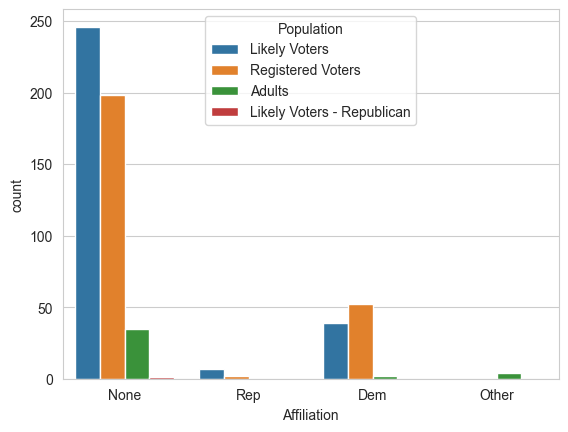

In [8]:
#Add the voting hue to further breakdown this party affiliation
sns.countplot(x='Affiliation', data= poll_df, hue = 'Population')

Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. Let's take another quick overview of the DataFrame.

/var/folders/kk/vyjrw4z92q79mlz6142n24q40000gn/T/ipykernel_87271/1392870800.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg = pd.DataFrame(poll_df.mean())
/var/folders/kk/vyjrw4z92q79mlz6142n24q40000gn/T/ipykernel_87271/1392870800.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = pd.DataFrame(poll_df.std())


<AxesSubplot:>

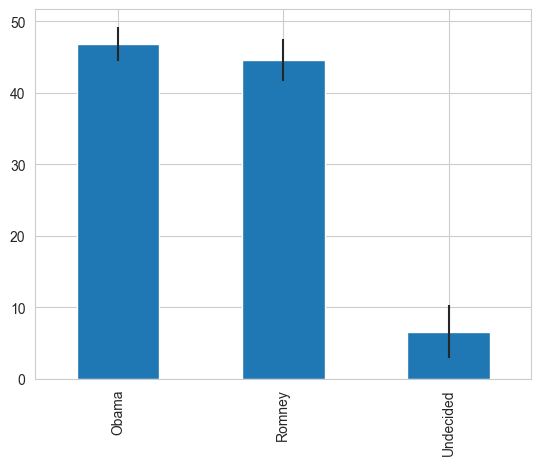

In [9]:
# Get the average for each candidate and the poll people who remained undecided
avg = pd.DataFrame(poll_df.mean())
avg.drop(['Number of Observations','Question Text', 'Question Iteration','Other']
         , axis = 0, inplace = True)

# After that let's get the error (standard deviation)
std = pd.DataFrame(poll_df.std())
std.drop(['Number of Observations','Question Text', 'Question Iteration','Other']
         , axis = 0, inplace = True)

# now plot using pandas using bar plot
avg.plot(yerr = std, kind= 'bar', legend = False)

In [10]:
#Concatenate the 2 data into 1 new dataframe (round the data so it looks neat)
poll_avg = pd.concat([round(avg,1),round(std,1)], axis = 1)

In [11]:
#Name the columns
poll_avg.columns = ['Average','STD']

In [12]:
poll_avg

,Average,STD
Obama,46.8,2.4
Romney,44.6,2.9
Undecided,6.6,3.7


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference.

<AxesSubplot:xlabel='End Date'>

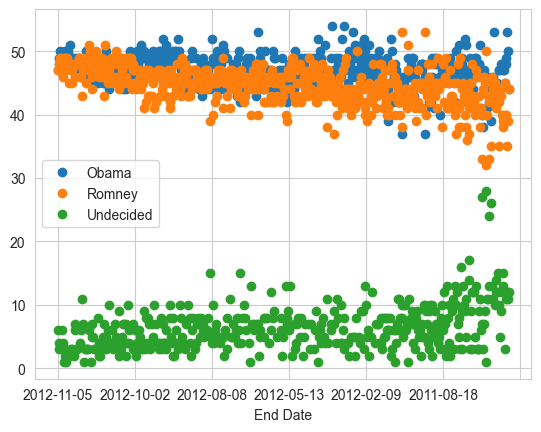

In [13]:
# Quick plot of sentiment in the polls versus time.
poll_df.plot(x= 'End Date', y = ['Obama','Romney','Undecided'], marker = 'o', linestyle  = '')

Next, we'll go ahead and answer another question related to plotting the sentiment versus time. Let's go ahead and plot out the difference between Obama and Romney and how it changes as time moves along. Remember from the last data project we used the datetime module to create timestamps, let's go ahead and use it now.

In [14]:
#For timestamps
from datetime import datetime

In [16]:
# Create a new column for the difference between the two candidates
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
# Preview the new column
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [17]:
# Set as_index=Flase to keep the 0,1,2,... index. Then we'll take the mean of the polls on that day.
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()

# Let's go ahead and see what this looks like
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1.0,0.09


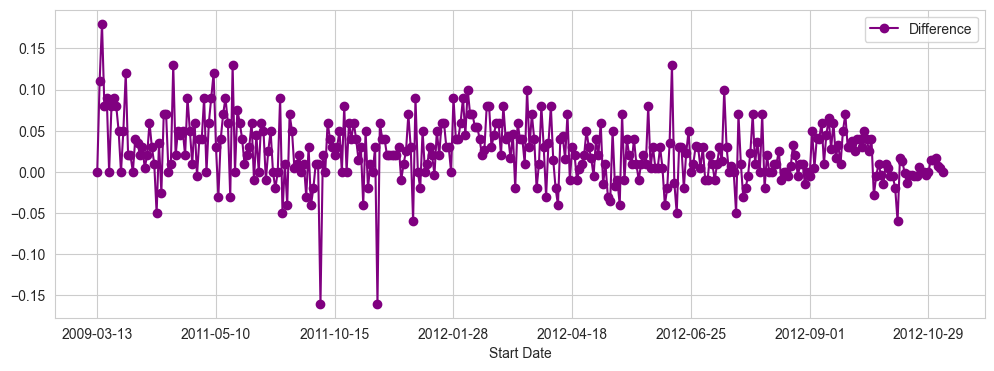

In [18]:
#Plotting the difference in polls between Obama and Romney versus time
fig = poll_df.plot(x = 'Start Date', y= 'Difference', figsize = (12,4),
                  marker = 'o', linestyle = '-', color = 'purple')

To make thing more interesting, I want to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Oct 3rd, Oct 11, and Oct 22nd. We will be plotting some lines as markers and then zoom in on the month of October.

In [19]:
# Set row count and xlimit list
row_in = 0
xlimit = []

# Cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10': #Find if the start date (formated like a string) has the month october
        xlimit.append(row_in)
        row_in +=1 #Count serves as a way to count the index
    else:
        row_in += 1
        
print(min(xlimit))
print(max(xlimit))

325
352


Text(0.5, 1.0, 'Difference in polls between Obama and Romney vs time')

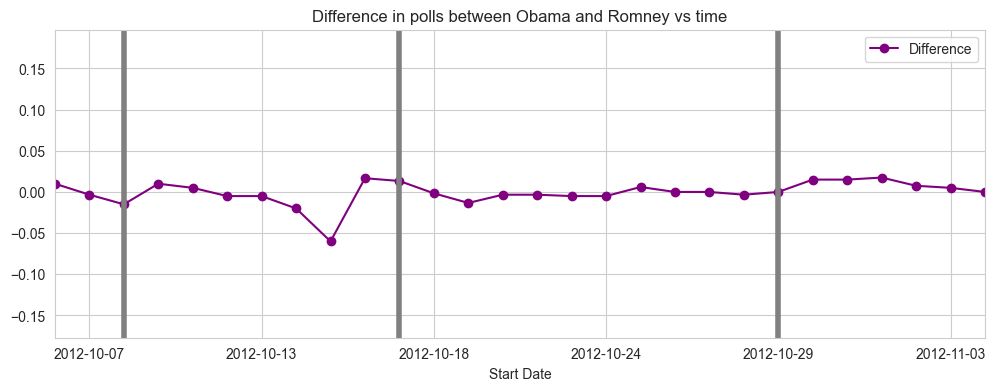

In [20]:
fig = poll_df.plot(x = 'Start Date', y= 'Difference', figsize = (12,4),
                  marker = 'o', linestyle = '-', color = 'purple',xlim=(329,356))

# Now add the debate markers
plt.axvline(x=329+2, linewidth =4, color = 'grey')

plt.axvline(x=329+10, linewidth= 4, color = 'grey')

plt.axvline(x=329+21, linewidth= 4, color = 'grey')

plt.title('Difference in polls between Obama and Romney vs time')

# Donor Data Set

Let's go ahead and switch gears and take a look at a data set consisting of information on donations to the federal campaign.

The questions we will be trying to answer while looking at this Data Set is:

In [21]:
#Set the  DataFrame as the csv file 
donor_df = pd.read_csv('Election_Donor_Data.csv')

/var/folders/kk/vyjrw4z92q79mlz6142n24q40000gn/T/ipykernel_58181/3882629959.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  donor_df = pd.read_csv('Election_Donor_Data.csv')


In [22]:
#Let's get some insight
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [23]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


What might be interesting to do is get a quick glimpse of the donation amounts, and the average donation amount. Let's go ahead and break down the data.

In [98]:
#Get a quick look at the various donation amounts
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
             ...  
 386.10          1
-113.40          1
 1385.00         1
 43.98           1
 2408.79         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [24]:
#Get the mean_donation
don_mean = donor_df['contb_receipt_amt'].mean()

#Get the std of the donation
don_std = donor_df['contb_receipt_amt'].std()


print('The average donation was %.2f with a std of %.2f ' %(don_mean, don_std))

The average donation was 298.24 with a std of 3749.67 


This means there is massive standard deviation! Let's see if there are any large donations or other factors messing with the distribution of the donations

In [25]:
#Make a Series from the dframe, use .copy() to avoid view errors
top_donor = donor_df['contb_receipt_amt'].copy()

#Sort it
top_donor.sort_values(ascending = True, inplace = True)

top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

Looks like we have some negative values, as well as some huge donation amounts! The negative values are due to the FEC recording refunds as well as donations, let's go ahead and only look at the positive contribution amounts

In [26]:
#Filter only the positive values
top_donor = top_donor[top_donor >0]

#Sort again
top_donor.sort_values(ascending = True, inplace = True)

#Give top 10 most common donation amount
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

A quick question we could verify is if donations are usually made in round number amounts? (e.g. 10,20,50,100,500 etc.) We can quickly visualize this by making a histogram and checking for peaks at those values. Let's go ahead and do this for the most common amounts, up to 2500 dollars.

<AxesSubplot:>

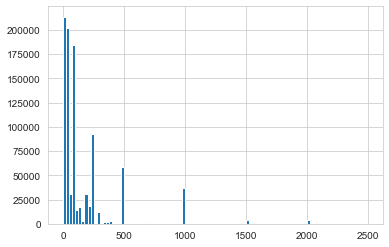

In [110]:
#Create a Series of the common donations limited to 2500
com_don = top_donor[top_donor < 2500]

# Set a high number of bins to account for the non-round donations and check histogram for spikes
com_don.hist(bins=100)

Looks like our intuition was right, since we spikes at the round numbers.

Let's dive deeper into the data and see if we can seperate donations by Party, in order to do this we'll have to figure out a way of creating a new 'Party' column. We can do this by starting with the candidates and their affliliation. Now let's go ahead and get a list of candidates

In [27]:
#Grab uniques object from the candidate column
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

Let's add a party affiliation column

In [28]:
#Dictionary of party affiliation
party_map = { 'Bachmann, Michelle': 'Republican',
             'Romney, Mitt': 'Republican', 
             'Obama, Barack': 'Democrat',
       "Roemer, Charles E. 'Buddy' III": 'Republican',
             'Pawlenty, Timothy': 'Republican',
       'Johnson, Gary Earl':'Republican', 
             'Paul, Ron':'Republican', 
             'Santorum, Rick':'Republican',
       'Cain, Herman':'Republican', 
             'Gingrich, Newt':'Republican', 
             'McCotter, Thaddeus G':'Republican',
       'Huntsman, Jon':'Republican', 
             'Perry, Rick':'Republican'}

#Now map the party with the candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

Let's look at our DataFrame and also make sure we clear refunds from the contribution amounts.

In [29]:
#Clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

#Preview DataFrame
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Let's start by aggregating the data by candidate. We'll take a quick look a the total amounts received by each candidate. First we will look a the total number of donations and then at the total amount.

In [30]:
# Groupby candidate and then displayt the total number of people who donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [31]:
#Group by total amount donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [32]:
#Start by getting groupby as an object
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

#Start index tracker
i=0

for don in cand_amount:
    print('The candidate %s raised %.0f dollars' %(cand_amount.index[i], don))
    print('\n')
    i+=1

The candidate Bachmann, Michelle raised 2711439 dollars


The candidate Cain, Herman raised 7101082 dollars


The candidate Gingrich, Newt raised 12832770 dollars


The candidate Huntsman, Jon raised 3330373 dollars


The candidate Johnson, Gary Earl raised 566962 dollars


The candidate McCotter, Thaddeus G raised 39030 dollars


The candidate Obama, Barack raised 135877427 dollars


The candidate Paul, Ron raised 21009620 dollars


The candidate Pawlenty, Timothy raised 6004819 dollars


The candidate Perry, Rick raised 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars


The candidate Romney, Mitt raised 88335908 dollars


The candidate Santorum, Rick raised 11043159 dollars




<AxesSubplot:xlabel='cand_nm'>

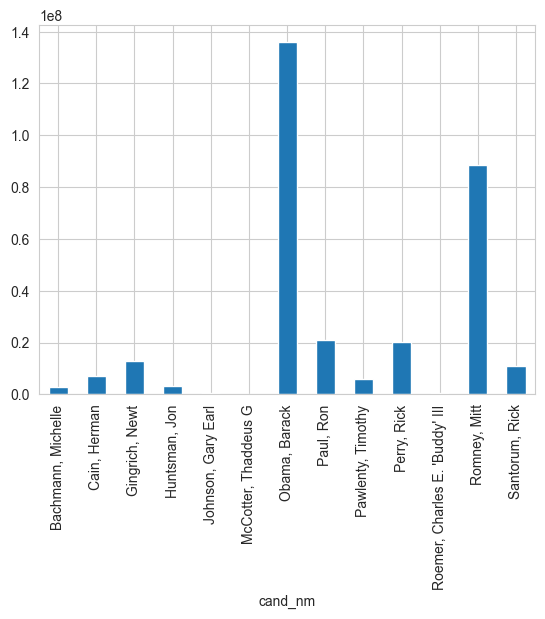

In [33]:
#Plot out donation amount by barplot
cand_amount.plot(kind='bar')

Now the comparison is very easy to see. As we saw berfore, clearly Obama is the front-runner in donation amounts, which makes sense, since he is not competeing with any other democratic nominees. How about we just compare Democrat versus Republican donations?

<AxesSubplot:xlabel='Party'>

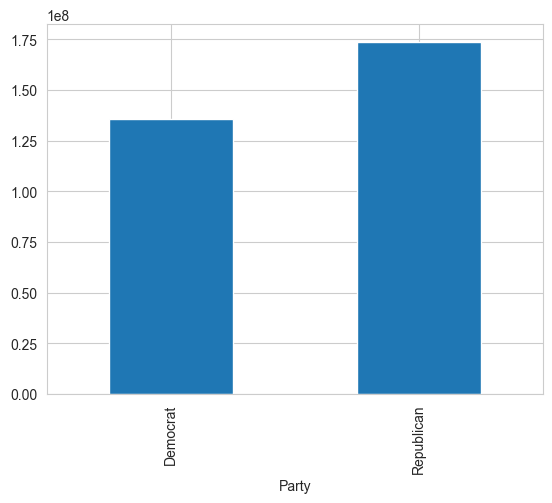

In [34]:
#Groupby party and then count total donation
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the dono_df DataFrame and then using pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). FInally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the comntributions by anyone with the same profession

In [35]:
#Use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt', index = 'contbr_occupation', 
                                    columns = 'Party', aggfunc = 'sum')
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [36]:
#Check size
occupation_df.shape

(45067, 2)

This is wway too large for a small static visualization. Thus we have to focus on a donation bucket limiting our donors -> Let's set our cut off at 1 million dollars

In [37]:
occupation_df = occupation_df[occupation_df.sum(1)> 1000000]

In [38]:
occupation_df.shape

(31, 2)

<AxesSubplot:xlabel='contbr_occupation'>

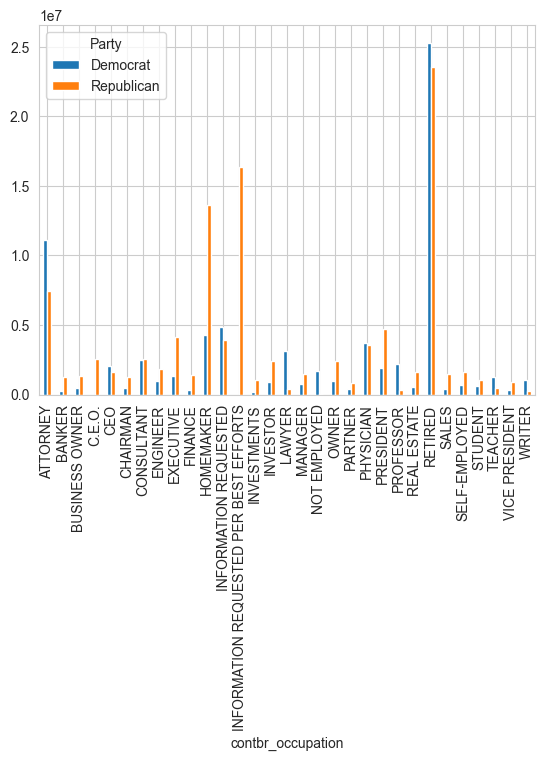

In [39]:
#Plot with bar graph
occupation_df.plot(kind='bar')

This is a bit hard to read, so we use barh (horizontal) to set occupation on the correct axis

<AxesSubplot:ylabel='contbr_occupation'>

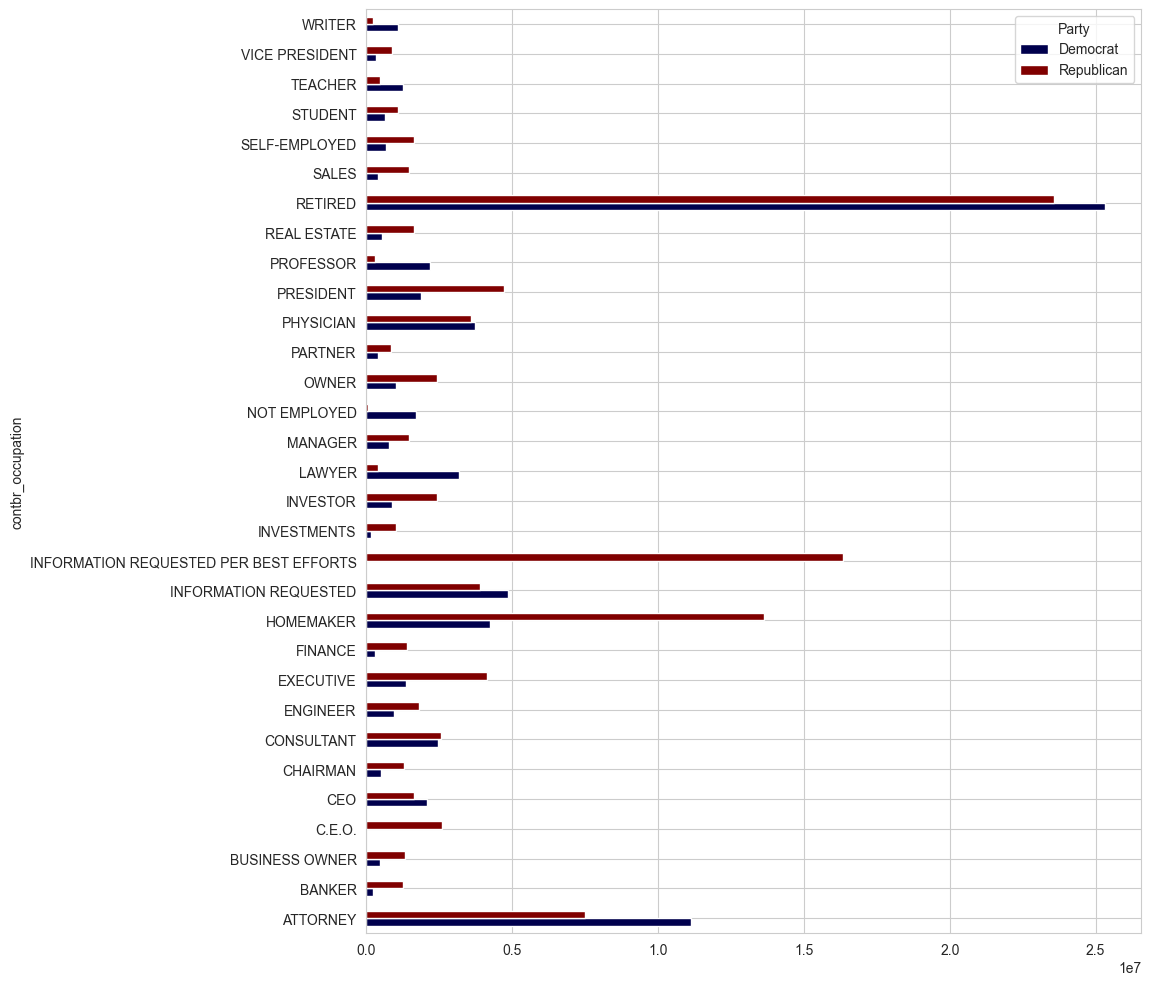

In [40]:
#Horizontal plot
occupation_df.plot(kind = 'barh', figsize = (10,12), cmap = 'seismic')

Looks like there are some occupations that are either mislabeled or aren't really occupations. Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.

In [41]:
#Drop unavailable occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'],
                  axis = 0 , inplace = True)

In [42]:
#Set new ceo row as sum of the current 2
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

#Drop CEO
occupation_df.drop('C.E.O.', inplace = True)

<AxesSubplot:title={'center':'Donations by Occupation for Each Party(in millions of dollars)'}, ylabel='contbr_occupation'>

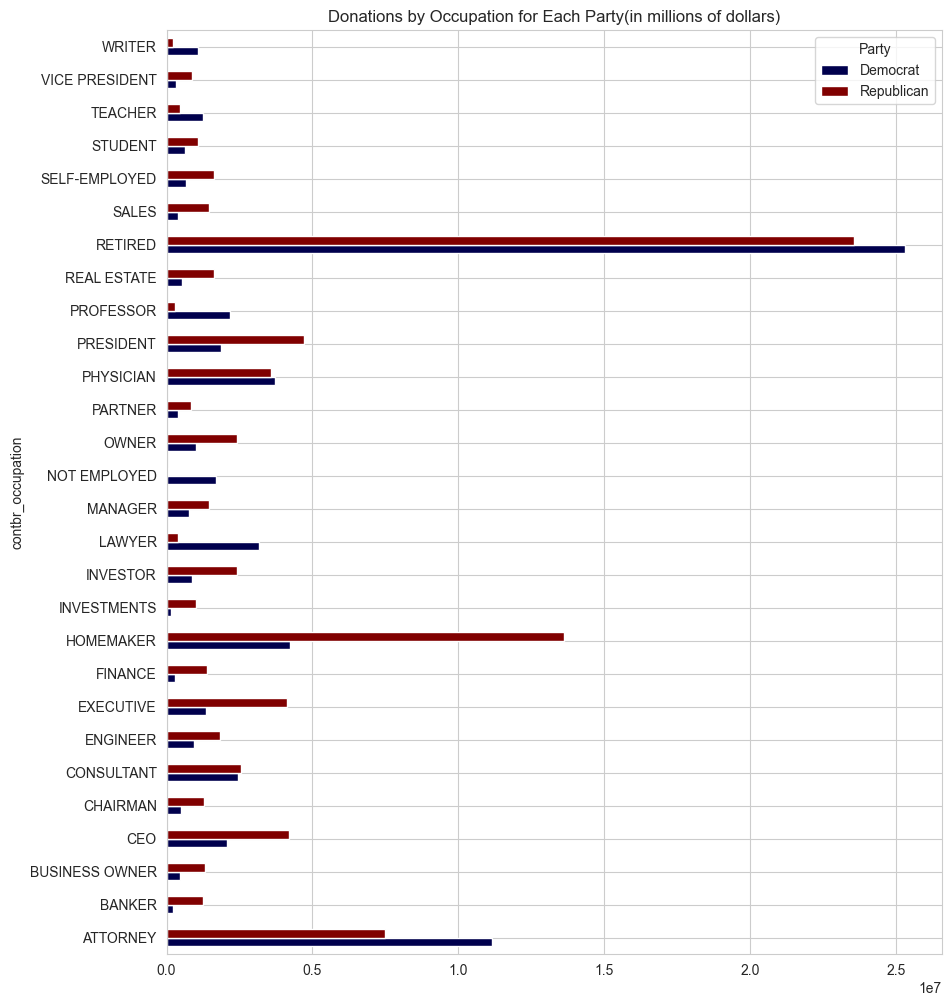

In [45]:
#Now repeat the previous plot
occupation_df.plot(kind = 'barh', figsize = (10,12), cmap = 'seismic', title = 'Donations by Occupation for Each Party(in millions of dollars)')